# Introdução ao Processamento Digital de Imagen - Trabalho 1
### Matheus Nicácio

##Importação e montagem

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## 1.1 Esboço a lápis
Implementar um efeito de esboço a lápis em uma imagem por meio dos seguintes passos:

1. Converter a imagem colorida para níveis de cinza.
2. Aplicar um filtro de desfoque gaussiano (por exemplo, com uma máscara de 21×21 pixels) para suavizar os detalhes da imagem.
3. Dividir a imagem em tons de cinza pela versão desfocada para realçar os contornos.


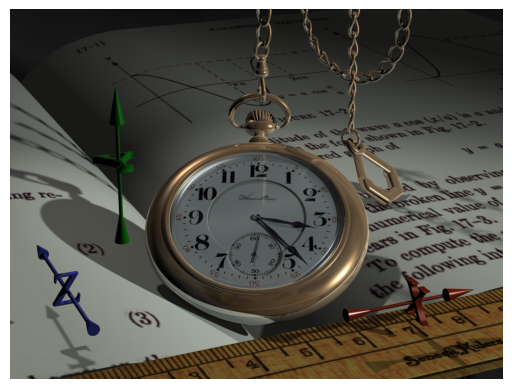

In [2]:
#Carregar imagem
path = r'watch.png'
img = cv2.imread(path,cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

In [3]:
#Aplicar filtros 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_gauss = cv2.GaussianBlur(img_gray, (21, 21), 0, borderType=cv2.BORDER_REFLECT)
img_detail = cv2.divide(img_gray, img_gauss, scale=255)

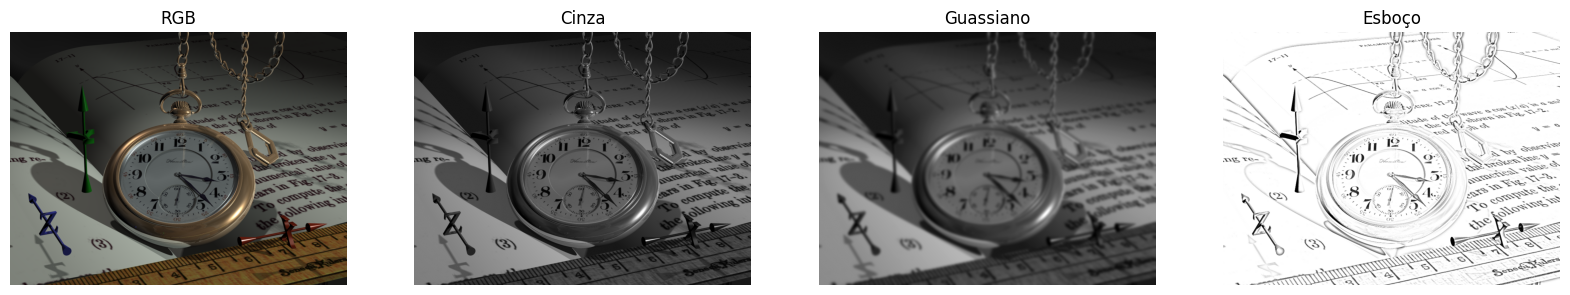

In [4]:

# Criar a figura
plt.figure(figsize=(20, 5))

# RGB
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('RGB')
plt.axis('off')
# Cinza
plt.subplot(1, 4, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Cinza')
plt.axis('off')

# Gauss
plt.subplot(1, 4, 3)
plt.imshow(img_gauss, cmap='gray')
plt.title('Guassiano')
plt.axis('off')

# Esboço
plt.subplot(1, 4, 4)
plt.imshow(img_detail, cmap='gray')
plt.title('Esboço')
plt.axis('off')

# Mostrar a figura
plt.show()


## 1.2 Ajuste de Brilho

Aplicar a correção gama para ajustar o brilho de uma imagem monocromática A de entrada e gerar uma imagem monocromática B de saída. A transformação pode ser realizada da seguinte forma:

1. Convertendo-se as intensidades dos pixels para o intervalo de [0, 255] para [0, 1].
2. Aplicando-se a equação $ B = A^{(1/\gamma)} $.
3. Convertendo-se os valores resultantes de volta para o intervalo [0, 255].

Realizar a correção com diferentes valores de $\gamma$.


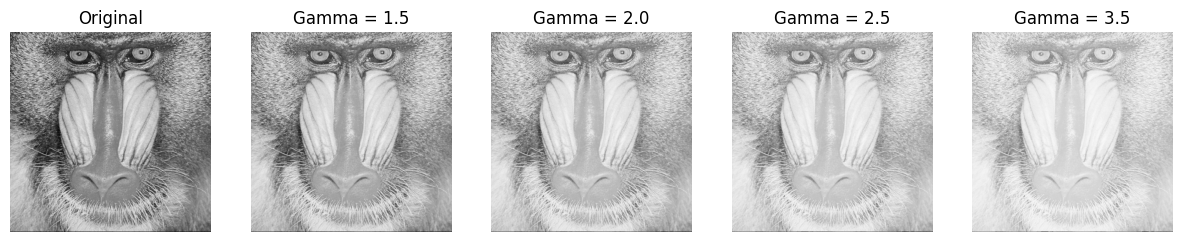

In [5]:
def gamma_correction(image, gamma_values):
    return np.uint8(255 * (image / 255.0) ** (1.0 / gamma_values[:, None, None]))

path = r'baboon_monocromatica.png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

gamma_values = np.array([1.5, 2.0, 2.5, 3.5])
corrected_images = gamma_correction(image, gamma_values)

fig, axes = plt.subplots(1, len(gamma_values) + 1, figsize=(15, 5))
images = np.stack([image] + list(corrected_images))
titles = np.array(["Original"] + [f"Gamma = {gamma}" for gamma in gamma_values])

_ = list(map(lambda ax, img, title: (ax.imshow(img, cmap='gray'), ax.set_title(title), ax.axis("off")), axes, images, titles))

plt.show()


## 1.3 Mosaico

Construir um mosaico de 4 × 4 blocos a partir de uma imagem monocromática. A disposição dos  ?
blocos deve seguir a numeração mostrada na Figura (c).

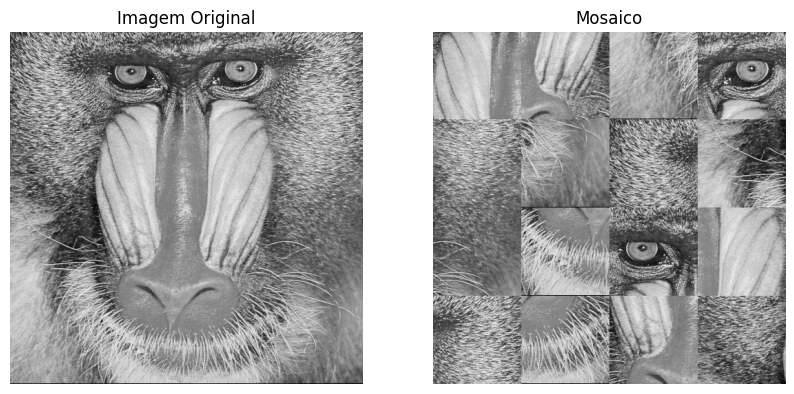

In [6]:
def rearrange_blocks(image, new_order, grid_size=(4, 4)):
    h, w = image.shape
    block_h, block_w = h // grid_size[0], w // grid_size[1]

    # Divisão em blocos e armazenar em uma matriz (g_h, g_w, b_h, b_w)
    blocks = image.reshape(grid_size[0], block_h, grid_size[1], block_w).swapaxes(1, 2)

    # Reordenar os blocos 
    reordered_blocks = blocks.reshape(-1, block_h, block_w)[new_order].reshape(grid_size[0], grid_size[1], block_h, block_w)

    # Reconstitui a imagem
    reordered = reordered_blocks.swapaxes(1, 2).reshape(h, w)

    return reordered


path = r'baboon_monocromatica.png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


new_order = np.array([6, 11, 13, 3, 8, 16, 1, 9, 12, 14, 2, 7, 4, 15, 10, 5]) - 1
mosaic = rearrange_blocks(image, new_order)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Imagem Original")
axes[0].axis("off")
axes[1].imshow(mosaic, cmap='gray')
axes[1].set_title("Mosaico")
axes[1].axis("off")

plt.show()


## 1.4 Alterar cores

Implementar um filtro para simular o efeito de fotografias antigas por meio da aplicação de uma transformação linear nas cores da imagem. Cada pixel deve ser multiplicado pela seguinte matriz de transformação:


\begin{bmatrix}
0.393 & 0.769 & 0.189 \\
0.349 & 0.686 & 0.168 \\
0.272 & 0.534 & 0.131 \\
\end{bmatrix}


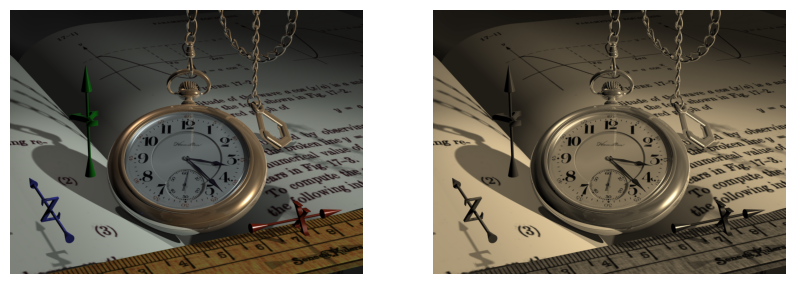

In [8]:

def antigo(imagem):
    # Matriz de transformação fornecida
    matriz_transformacao = np.array([[0.393, 0.769, 0.189],
                                     [0.349, 0.686, 0.168],
                                     [0.272, 0.534, 0.131]])

    # Transformação em cada pixel
    imagem_transformada = cv2.transform(imagem, matriz_transformacao)

    # Garante que os valores de pixel estejam no intervalo correto (0-255)
    imagem_transformada = np.clip(imagem_transformada, 0, 255).astype(np.uint8)

    return imagem_transformada



path = r'watch.png'
imagem = cv2.imread(path, cv2.IMREAD_COLOR)
imagem_com_filtro = antigo(imagem)





plt.figure(figsize=(10, 5))

#---------------Original------------
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off')

#-------------------Filtro----------
plt.subplot(1, 2, 2)
plt.imshow(imagem_com_filtro)
plt.axis('off')

plt.show()


## 1.5 Transformação de Imagens Coloridas  

### (a) Aplicação de Efeito Sépia  

Dada uma imagem colorida no formato RGB, alterar a imagem conforme as seguintes operações:  

\[
R' = 0.393R + 0.769G + 0.189B
\]  
\[
G' = 0.349R + 0.686G + 0.168B
\]  
\[
B' = 0.272R + 0.534G + 0.131B
\]  

Após a transformação, caso \( R' \), \( G' \) ou \( B' \) tenha valor maior do que 255, ele deve ser limitado a 255.  

### (b) Conversão para Tons de Cinza  

Dada uma imagem colorida no formato RGB, alterar a imagem tal que ela contenha apenas uma banda de cor, cujos valores são calculados pela média ponderada:  

\[
I = 0.2989R + 0.5870G + 0.1140B
\]  


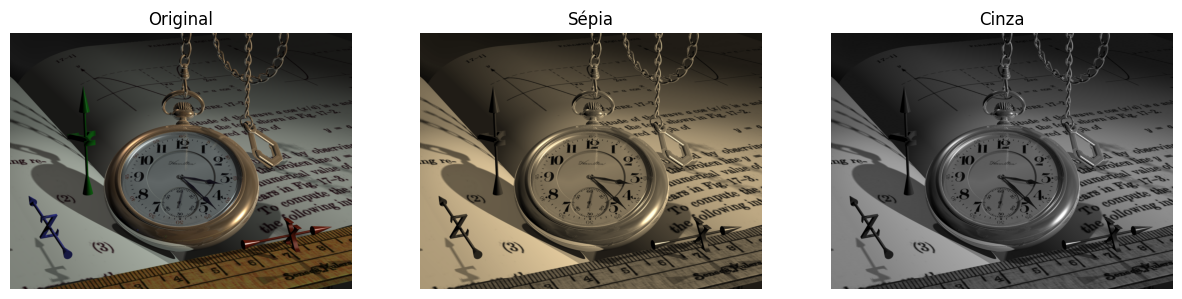

In [10]:

def sepia(image):

    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])


    sepia_image = np.dot(image[..., :3], sepia_filter.T)
    sepia_image = np.clip(sepia_image, 0, 255)

    return sepia_image.astype(np.uint8)

def convert_to_grayscale(image):
    
    grayscale_weights = np.array([0.2989, 0.5870, 0.1140])
    grayscale_image = np.dot(image[..., :3], grayscale_weights)

    return grayscale_image.astype(np.uint8)





path = r'watch.png'
image = cv2.imread(path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

#------------Filtros
sepia_image = sepia(image) 
grayscale_image = convert_to_grayscale(image)  








fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

#Sepia
axes[1].imshow(sepia_image)
axes[1].set_title("Sépia")
axes[1].axis("off")

#Cinza
axes[2].imshow(grayscale_image, cmap="gray")
axes[2].set_title("Cinza")
axes[2].axis("off")




plt.show()



## 1.6 Extração dos Planos de Bits de uma Imagem Monocromática  

Os níveis de cinza de uma imagem monocromática com $m$ bits podem ser representados na forma de um polinômio de base 2:  

$$
a_{m-1} 2^{m-1} + a_{m-2} 2^{m-2} + \dots + a_1 2^1 + a_0 2^0
$$

O plano de bits de ordem 0 é formado pelos coeficientes $a_0$ de cada pixel, enquanto o plano de bits de ordem $m - 1$ é formado pelos coeficientes $a_{m-1}$.  


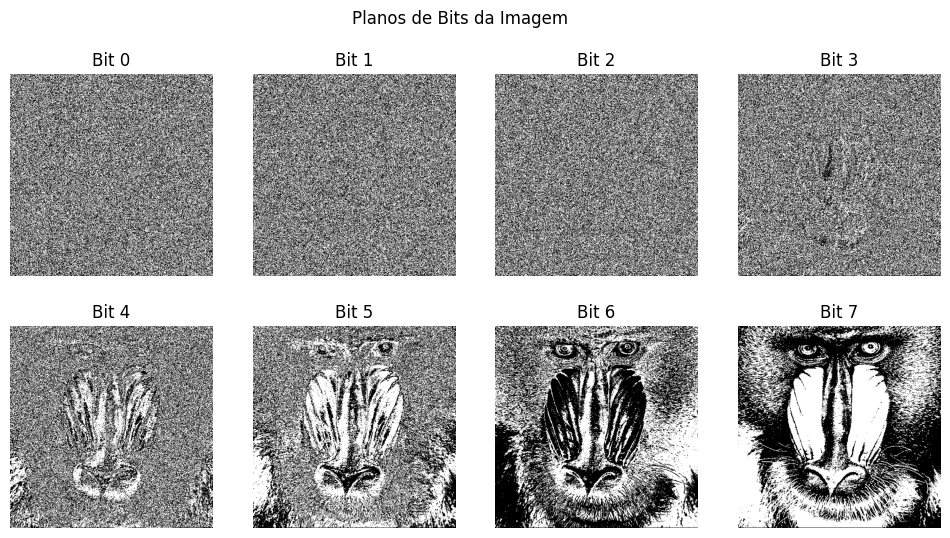

In [11]:

def extract_bit_planes(image_path):
    # Carregar a imagem em escala de cinza
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Criar os 8 planos de bits em ordem correta (bit 0 ao bit 7
    bit_planes = np.unpackbits(img.reshape(-1, 1), axis=1)[:, -8:][:, ::-1]
    bit_planes = bit_planes * 255
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle("Planos de Bits da Imagem")
    
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(bit_planes[:, i].reshape(img.shape), cmap='gray')
        ax.set_title(f'Bit {i}')
        ax.axis('off')
    
    plt.show()


path = r'baboon_monocromatica.png'
extract_bit_planes(path)



## 1.7 Combinação de Duas Imagens Monocromáticas  

Combinar duas imagens monocromáticas de mesmo tamanho por meio da média ponderada de seus níveis de cinza.  

Sejam $I_1(x, y)$ e $I_2(x, y)$ duas imagens de mesmo tamanho, a combinação é dada por:  

$$
I_{\text{resultado}}(x, y) = \alpha I_1(x, y) + (1 - \alpha) I_2(x, y)
$$  

onde $0 \leq \alpha \leq 1$ é o fator de ponderação que controla a influência de cada imagem na composição final.  


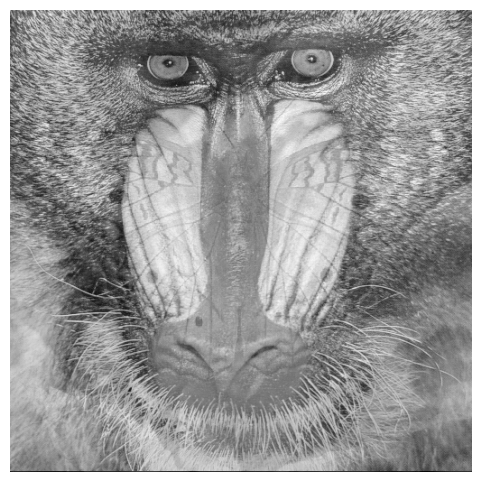

In [12]:


path1 = r'baboon_monocromatica.png'
path2 = r'butterfly.png'
I1= cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread(path2,cv2.IMREAD_GRAYSCALE)

# Redimensiona a segunda imagem para o tamanho da primeira (caso necessário)
I2 = cv2.resize(I2, (I1.shape[1], I1.shape[0]))


# Combina as imagens de forma usando a média ponderada alterando alpha
alpha = 0.7
I_resultado = (alpha * I1 + (1 - alpha) * I2).astype(np.uint8)


plt.figure(figsize=(6, 6))
plt.imshow(I_resultado, cmap='gray')
plt.axis('off')  
#plt.title("Imagem Combinada")
plt.show()


## 1.8 Transformações no Espaço de Intensidades de uma Imagem Monocromática  

Dada uma imagem monocromática,

- **(a)transformar seu espaço de intensidades (níveis de cinza)** para:  

- **(b) Obter o negativo da imagem:**  
  O nível de cinza 0 será convertido para 255, o nível 1 para 254 e assim por diante.  

- **(c) Converter o intervalo de intensidades para [100, 200]:**  
  Ajustar os níveis de cinza para que passem a ocupar o intervalo de 100 a 200.  

- **(d) Inverter os valores dos pixels das linhas pares da imagem:**  
  Os valores dos pixels da linha 0 serão posicionados da direita para a esquerda, os valores dos pixels da linha 2 serão posicionados da direita para a esquerda e assim por diante.  

- **(e) Espelhar as linhas da metade superior da imagem na parte inferior:**  
  A metade superior da imagem será refletida sobre a metade inferior.  

- **(f) Aplicar um espelhamento vertical na imagem:**  
  Todas as linhas da imagem serão invertidas verticalmente.  


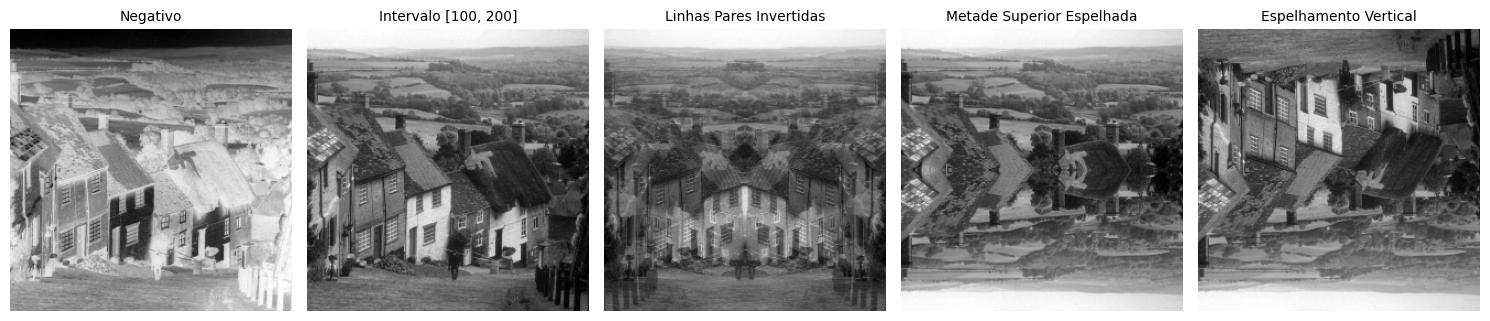

In [13]:

def carregar_imagem(caminho):
    img = cv2.imread(caminho, cv2.IMREAD_GRAYSCALE)
    return img

# (b) Obter o negativo da imagem
def negativo_imagem(img):
    return 255 - img

# (c) Converter o intervalo de intensidades para [100, 200]
def converter_intervalo(img, min_val=100, max_val=200):
    min_img, max_img = np.min(img), np.max(img)
    if min_img == max_img:
        return np.full_like(img, (min_val + max_val) // 2, dtype=np.uint8)  
    return ((img - min_img) / (max_img - min_img) * (max_val - min_val) + min_val).astype(np.uint8)

# (d) Inverter os valores dos pixels das linhas pares da imagem
def inverter_linhas_pares(img):
    img_mod = img.copy()
    img_mod[::2] = np.flip(img_mod[::2].copy(), axis=1)  
    return img_mod

# (e) Espelhar as linhas da metade superior da imagem na parte inferior
def espelhar_metade_superior(img):
    img_mod = img.copy()
    h = img.shape[0] // 2
    img_mod[h:] = img_mod[:h][::-1]  
    return img_mod

# (f) Aplicar um espelhamento vertical na imagem
def espelhamento_vertical(img):
    return np.flipud(img)

def exibir_imagens(imagens, titulos):
    fig, axes = plt.subplots(1, len(imagens), figsize=(15, 5))

    for ax, img, titulo in zip(axes, imagens, titulos):
        ax.imshow(cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2)), cmap='gray')  
        ax.set_title(titulo, fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

path = r'city.png'
imagem = carregar_imagem(path)



imagem_negativo = negativo_imagem(imagem)
imagem_intervalo = converter_intervalo(imagem)
imagem_linhas_pares = inverter_linhas_pares(imagem)
imagem_metade_superior = espelhar_metade_superior(imagem)
imagem_vertical = espelhamento_vertical(imagem)

''
exibir_imagens(
    [imagem_negativo, imagem_intervalo, imagem_linhas_pares, imagem_metade_superior, imagem_vertical],
    ['Negativo', 'Intervalo [100, 200]', 'Linhas Pares Invertidas', 'Metade Superior Espelhada', 'Espelhamento Vertical']
)


## 1.9 Quantização de Imagens  

A quantização refere-se ao número de níveis de cinza usados para representar uma imagem monocromática. A quantização está relacionada à profundidade de uma imagem, a qual corresponde ao número de bits necessários para armazená-la.  

Representar uma imagem com diferentes níveis de quantização.  


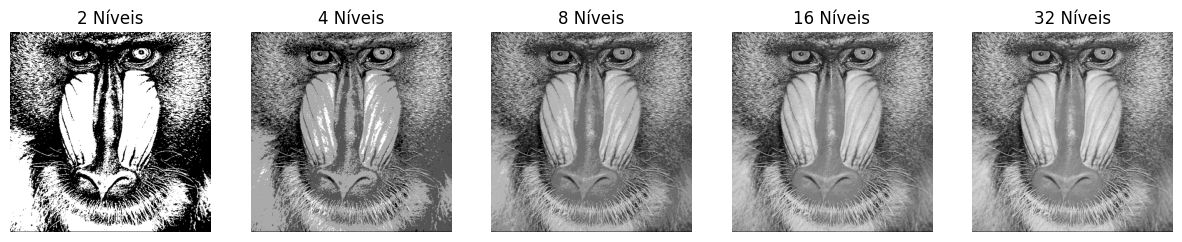

In [14]:

path = r'baboon_monocromatica.png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def quantize_image(image, num_levels):
    image_normalized = image.astype(np.float32) / 255.0

    quantized_image = np.floor(image_normalized * num_levels) / num_levels

    # Reverter para o intervalo original [0, 255]
    quantized_image = (quantized_image * 255).astype(np.uint8)
    return quantized_image

# Níveis de quantização
levels_list = [2, 4, 8, 16, 32]

quantized_images = [quantize_image(image, levels) for levels in levels_list]
fig, axes = plt.subplots(1, len(levels_list), figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.imshow(quantized_images[i], cmap='gray')
    ax.set_title(f'{levels_list[i]} Níveis')
    ax.axis('off')

plt.show()


## 1.10 Filtragem de Imagens  

A filtragem aplicada a uma imagem digital é uma operação local que altera os valores de intensidade dos pixels da imagem levando-se em conta tanto o valor do pixel em questão quanto os valores de pixels vizinhos.  

No processo de filtragem, utiliza-se uma operação de convolução de uma máscara pela imagem. Este processo equivale a percorrer toda a imagem alterando seus valores conforme os pesos da máscara e as intensidades da imagem.  

## Aplicação de Filtros  

Aplicar os filtros $h_1$ a $h_{11}$ em uma imagem digital monocromática.  

Explicar os efeitos de cada filtro.  

Os filtros $h_3$ e $h_4$ deverão ser aplicados à imagem tanto individualmente quanto de forma combinada, somando-se as respostas de cada um dos filtros por meio da expressão:  

$$
p = \sqrt{(h_3)^2 + (h_4)^2}
$$  


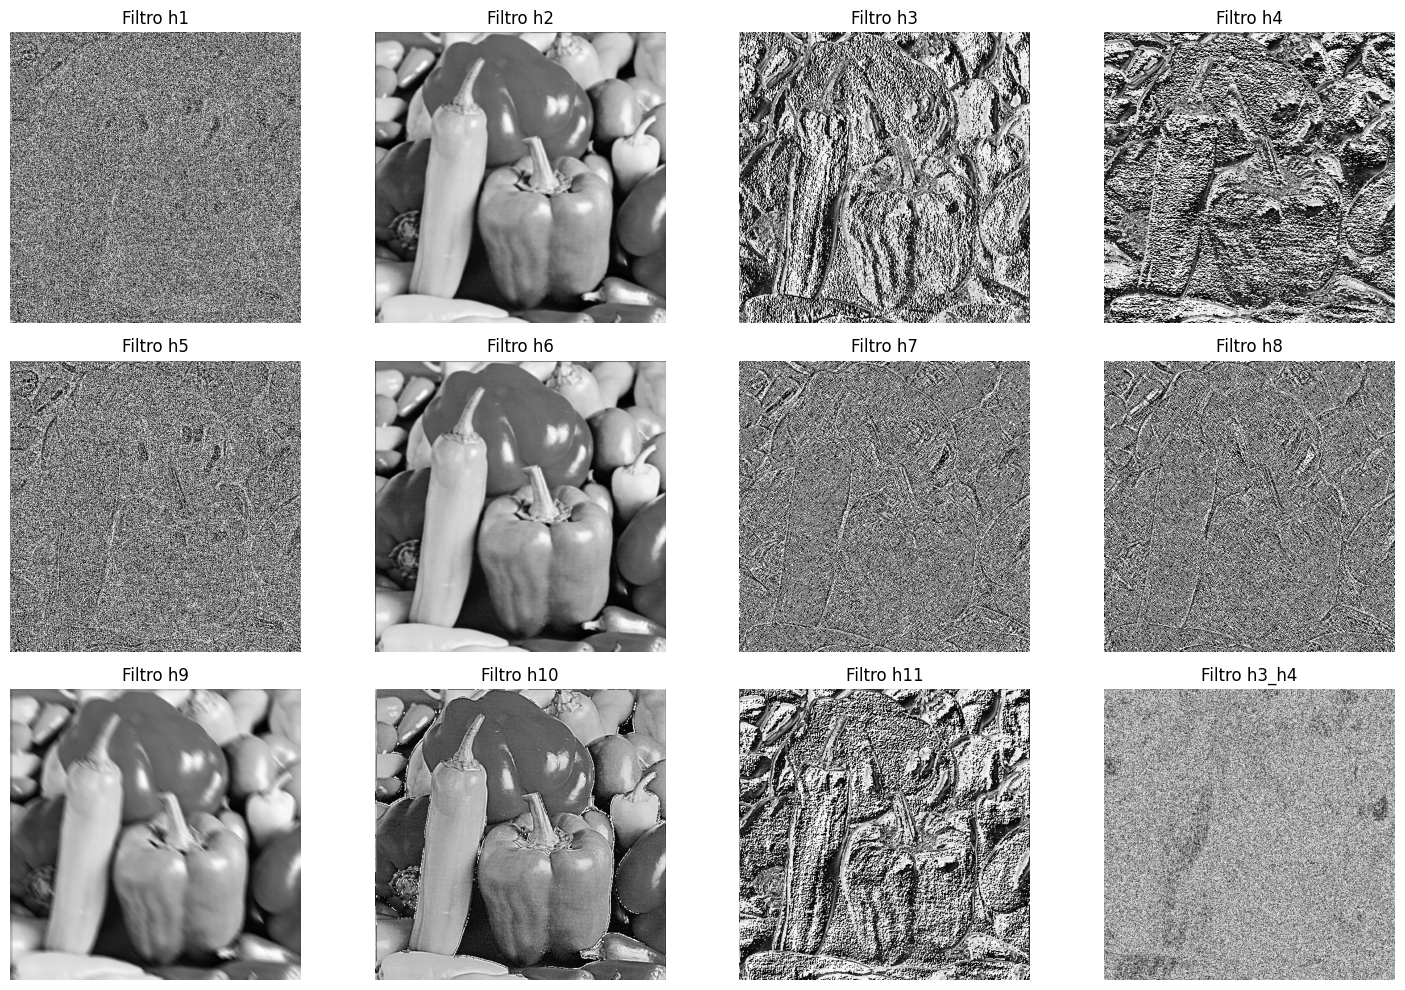

In [15]:

# Filtros
filtros = {
    'h1': np.array([[0, 0, -1, 0, 0],
                    [0, -1, -2, -1, 0],
                    [-1, -2, 16, -2, -1],
                    [0, -1, -2, -1, 0],
                    [0, 0, -1, 0, 0]]),

    'h2': (1/256) * np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, 36, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]),

    'h3': np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]),

    'h4': np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]]),

    'h5': np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]]),

    'h6': (1/9) * np.ones((3, 3)),

    'h7': np.array([[-1, -1, 2],
                    [-1, 2, -1],
                    [2, -1, -1]]),

    'h8': np.array([[2, -1, -1],
                    [-1, 2, -1],
                    [-1, -1, 2]]),

    'h9': (1/9) * np.eye(9),

    'h10': (1/8) * np.array([[-1, -1, -1, -1, -1],
                              [-1, 2, 2, 2, -1],
                              [-1, 2, 8, 2, -1],
                              [-1, 2, 2, 2, -1],
                              [-1, -1, -1, -1, -1]]),

    'h11': np.array([[-1, -1, 0],
                      [-1, 0, 1],
                      [0, 1, 1]])
}


def carregar_imagem(caminho):
    return cv2.imread(caminho, cv2.IMREAD_GRAYSCALE)


def aplicar_filtro(imagem, filtro):
    return convolve(imagem, filtro, mode='reflect')



def processar_imagem(caminho):
    imagem = carregar_imagem(caminho)
    resultados = {}

    for nome, filtro in filtros.items():
        resultados[nome] = aplicar_filtro(imagem, filtro)

    # Combinação de h3 e h4
    resultados['h3_h4'] = np.sqrt(np.square(resultados['h3']) + np.square(resultados['h4']))

    num_filtros = len(resultados)
    cols = 4
    rows = (num_filtros // cols) + (num_filtros % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, (nome, img) in enumerate(resultados.items()):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Filtro {nome}")
        axes[i].axis('off')

    for i in range(len(resultados), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

caminho_imagem = r'peppers.png'  # Substitua pelo caminho real
processar_imagem(caminho_imagem)
